# From here we do an analysis of the Unassociated and Associated probabilities based on the 6 classes using RF and NN algorithms

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("d:/work_projects/Projects/Fermi-Followup/4FGL-DR3_probabilistic_classification/4FGL-DR3_probabilistic_classification/4FGL-DR3_6class_GMM_nmin100_prob_cat.csv")

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'sin(GLAT)', 'cos(GLON)', 'sin(GLON)',
       'log10(Energy_Flux100)', 'log10(Unc_Energy_Flux100)',
       'log10(Signif_Avg)', 'LP_index1000MeV', 'LP_beta', 'LP_SigCurv',
       'log10(Variability_Index)', 'CLASS1', '1_RF', '1_NN', '2_RF', '2_NN',
       '3_RF', '3_NN', '4_RF', '4_NN', '5_RF', '5_NN', '6_RF', '6_NN'],
      dtype='object')


In [4]:
#I define the keys for classes to be either unassociated or associated in the 4FGL-DR3
key_unas=df["CLASS1"]=="unas"
key_asoc= df["CLASS1"]!="unas"

In [5]:
import matplotlib.pyplot as plt

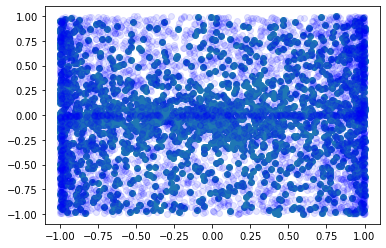

In [30]:
plt.scatter(df["sin(GLON)"][key_unas],df["sin(GLAT)"][key_unas])  ##Just Plotting the galactic cordinates to see the distribution
plt.scatter(df["sin(GLON)"][key_asoc],df["sin(GLAT)"][key_asoc],alpha=0.1,color="b")

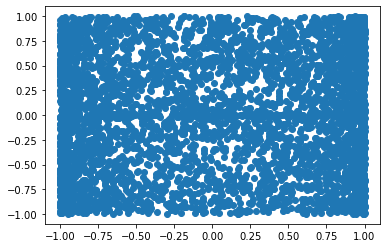

In [7]:
plt.scatter(df["sin(GLON)"][key_asoc],df["sin(GLAT)"][key_asoc])

In [8]:
print(df["CLASS1"][key_asoc].unique())##All possible classes in 4FGL-DR2

['bcu' 'bll' 'fsrq' 'unk' 'spp' 'psr' 'rdg' 'agn' 'msp' 'glc' 'snr' 'gal'
 'sbg' 'sfr' 'bin' 'hmb' 'nlsy1' 'lmb' 'nov' 'css' 'pwn' 'ssrq' 'sey' 'gc']


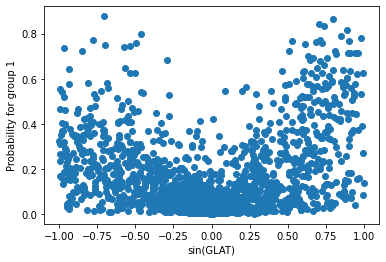

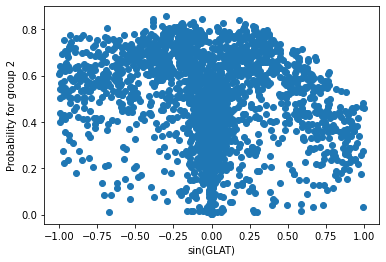

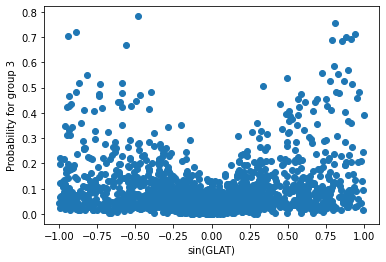

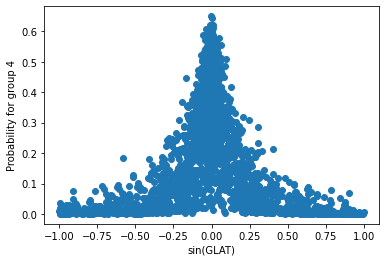

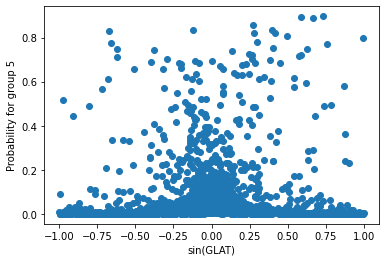

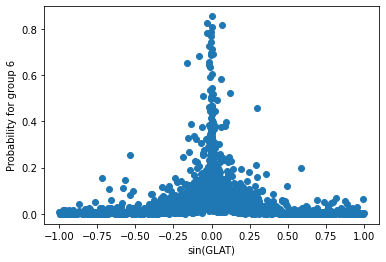

In [9]:
#Here we look at the sin(GLAT) for all unassociated sources with probabilities of being assigned to different groups
feature="sin(GLAT)"
for i in range(6):
    plt.scatter(df[feature][key_unas],((df["{}_RF".format(i+1)][key_unas]+df["{}_NN".format(i+1)][key_unas])/2))
    plt.xlabel("{}".format(feature))
    plt.ylabel("Probability for group {}".format(i+1))
    plt.show()


In [111]:
#Calculate the total probability for every group by averaging the neural net and rf probabilities.
#The column just has a number to name it. We also print the individual highest probabilities for unassociated sources, for all
#6 groups
print("Total Number of Unassociated sources: ", len(df[key_unas]))
for i in range(6):
    df["{}".format(i+1)]=(df["{}_RF".format(i+1)]+df["{}_NN".format(i+1)])/2
    #if df["{}".format(i+1)]
    print(df[["Unnamed: 0","{}".format(i+1)]][key_unas][df["{}".format(i+1)]>0.68].sort_values(by=["{}".format(i+1)],ascending=False))

Total Number of Unassociated sources:  2157
              Unnamed: 0         1
710    4FGL J0259.0+0552  0.877065
2826   4FGL J1146.0-0638  0.862670
3991   4FGL J1550.6+6027  0.844743
4012   4FGL J1554.2+2008  0.834603
2578   4FGL J1049.8+2741  0.817358
1340   4FGL J0543.5-8741  0.796592
3762   4FGL J1504.6+4343  0.791275
2958   4FGL J1210.1+3241  0.782714
6207   4FGL J2159.6-4620  0.770291
2562   4FGL J1047.2+6740  0.769747
2719   4FGL J1120.1-2645  0.768690
2782   4FGL J1131.6+4657  0.767147
4226   4FGL J1631.8+4144  0.760704
2268   4FGL J0938.8+5155  0.760351
6479   4FGL J2317.7+2839  0.759685
2187   4FGL J0914.5+6845  0.753717
883    4FGL J0343.3-6303  0.748191
1274  4FGL J0531.8-6639e  0.746753
1069   4FGL J0438.0-7329  0.740637
463    4FGL J0156.3-2420  0.734178
6333   4FGL J2234.2-4156  0.724142
4514   4FGL J1716.1+2309  0.722907
2709   4FGL J1118.1+5857  0.721316
3632   4FGL J1436.4+3900  0.716070
3110   4FGL J1243.5+5311  0.715008
3471   4FGL J1403.7+2429  0.713721
3493   4FGL

C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3320155033.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Total Number of Unassociated sources: ", len(df[key_unas]))
C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3320155033.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[["Unnamed: 0","{}".format(i+1)]][key_unas][df["{}".format(i+1)]>0.68].sort_values(by=["{}".format(i+1)],ascending=False))
C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3320155033.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[["Unnamed: 0","{}".format(i+1)]][key_unas][df["{}".format(i+1)]>0.68].sort_values(by=["{}".format(i+1)],ascending=False))
C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3320155033.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[["Unnamed: 0","{}".format(i+1)]][key_unas][df["{}".format(i+1)]>0.68].sort_values(by=[

In [112]:
#Get the index of the column which has the highest value, which defines the assigned group for the highest probability
df["predicted_class_num"]=df[["1", "2","3","4","5","6"]].idxmax(axis=1)
print(df["predicted_class_num"].value_counts())

2    3191
1    1674
3     742
4     509
6     274
5     268
Name: predicted_class_num, dtype: int64


In [113]:
#Define groups. Unassociated sources have group 0. The rest are divided into the 6 groups accordingly based on 4fgl-dr2 class.
#This number also corresponds to the number assigned to the column above. I am just using it to get outliers
df["original_group"]=1
df["original_group"][key_unas]=0 
df["original_group"][df["CLASS1"].isin({"bcu","ssrq"})]=2
df["original_group"][df["CLASS1"].isin({"fsrq","sey","nlsy1","agn"})]=3
df["original_group"][df["CLASS1"].isin({"glc","nov","spp"})]=4
df["original_group"][df["CLASS1"].isin({"msp","lmb"})]=5
df["original_group"][df["CLASS1"].isin({"hmb","psr","sfr","snr","gc","pwn","gal","bin"})]=6


print(df["original_group"].dtype)


int64


C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3241823589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["original_group"][key_unas]=0
C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3241823589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["original_group"][df["CLASS1"].isin({"bcu","ssrq"})]=2
C:\Users\aakas\AppData\Local\Temp/ipykernel_5676/3241823589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["original

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>]], dtype=object)

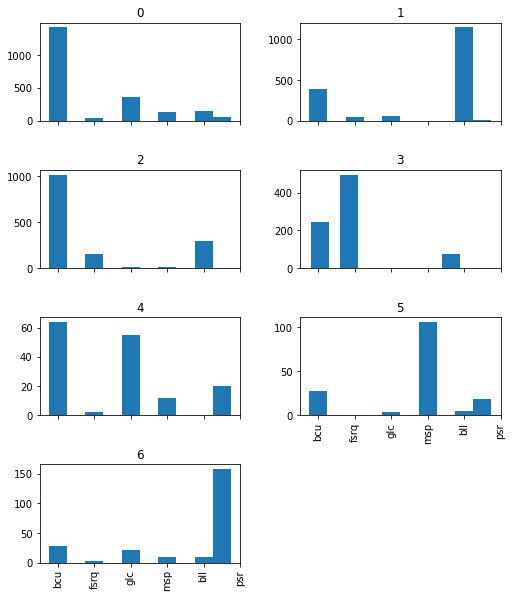

In [114]:
import numpy as np
df["predicted_class"]=df["predicted_class_num"].replace(to_replace={'1':"bll",'2':"bcu",'3':"fsrq",'4':"glc",'5':"msp",'6':"psr"})
df.hist(column="predicted_class",by="original_group",figsize=(8,10),align='left',sharex=True,layout=(4,2),width=0.5)

In [115]:
#Check the difference between predictions and original class for associated sources
df["classdiff"]=df["original_group"]-df["predicted_class_num"].astype(int)
print(df["classdiff"][key_asoc].value_counts())

 0    2975
-1     571
 1     557
 2     159
-2      84
-3      65
 4      33
 3      31
 5      10
-5       8
-4       8
Name: classdiff, dtype: int64


# From here on I match with SGU list to see what they look like

In [16]:
df2=pd.read_csv("d:/work_projects/Projects/Fermi-Followup/SGU_pulsar_searches.csv")

In [18]:
print(df2.columns)

Index(['Source_Name', 'Closest_Searched_source', 'Distance (arcmin)',
       'RA_search', 'DEC_search'],
      dtype='object')


In [20]:
key_SGU=df["Unnamed: 0"].isin(df2["Source_Name"])

In [92]:
print(df["Unnamed: 0"][key_SGU])

3595    4FGL J1427.8-6051
4702    4FGL J1737.3-3332
4720    4FGL J1739.3-2531
4567    4FGL J1721.7-3917
4624    4FGL J1729.1-3503
              ...        
1982    4FGL J0828.4-4444
5432    4FGL J1902.5+0654
2068    4FGL J0848.8-4328
5393    4FGL J1858.0+0354
5421    4FGL J1901.1+0730
Name: Unnamed: 0, Length: 95, dtype: object


In [93]:
print(df2.value_counts())

Source_Name        Closest_Searched_source  Distance (arcmin)  RA_search   DEC_search
4FGL J0009.2+6847  P72Y0024                 14.982972          2.032500     68.563900    1
4FGL J1754.6-2933  1FGL J1747.6-2820c       117.126206         266.918300  -28.335400    1
4FGL J1819.9-2926  J1812-3144               165.695858         273.208333  -31.735833    1
4FGL J1819.9-1530  24M2244                  8.194942           274.849400  -15.520200    1
4FGL J1818.6-3206  P7R42830B                24.440937          275.103000  -32.286000    1
                                                                                        ..
4FGL J1444.9-5939  J1503.4-5805c            177.931152         226.000000  -58.000000    1
4FGL J1427.8-6051  J1350.8-6212c            287.495666         207.400000  -62.400000    1
4FGL J1403.5-6236  J1350.8-6212c            97.150404          207.400000  -62.400000    1
4FGL J1351.6-6142  J1350.8-6212c            44.174289          207.400000  -62.400000    1
4FGL

# We only look at 95 sources first. The other 13 haven't been matched since their source name in Fermi has c suffix (confused flag)

['bcu' 'fsrq' 'glc' 'msp' 'bll' 'psr']


Text(0.5, 0, 'Predicted Group')

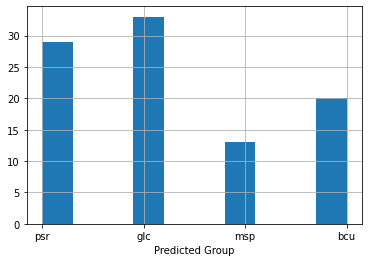

In [103]:
print(df["predicted_class"].unique())
df["predicted_class"][key_SGU].hist() 
plt.xlabel("Predicted Group")